# An Exploratory Analysis of Entrepreneurial Fear
### by Cassandra Sehic

Hello! For my own selfish reasons, I am curious about fear of entrepreneurship. Most of my life I have been interested in becoming an entrepreneur myself, but have felt a couple different things holding me back at different points in my life. At these various points, the roadblocks have ranged from lack of a good idea, to lack of financial literacy, to lack of capital, to lack of time, to.. I digress... But! I do have a growth mindset and know I can overcome these particular challenges, though, I do find it strange that when I take the time to actually think about making the first steps of starting my own business, I feel fear. Luckily, I found some interesting data from GEM (Global Entrepreneurship Monitor), that publishes survey data about the attitudes and behaviors revolving around entrepreneurship from different countries. This notebook aims to walk through my thought process as I use what I have learned in statistics and elsewhere to explore why fear of entrepreneurship is higher in some countries and lower in others (and possibly uncover something that can help me personally along the way). 

To be clear, I do understand that this process seems a little backwards for a research paper, but since my main goals are to satiate my own curiosity and practice my data analysis skills, I do intend to showcase my exploration of the data I have collected before I go about speculating about the reasons things are the way they are. Basically, I am not expecting nor trying to find anything truly groundbreaking, but rather work like a scientist in this tiny world I have created that is my Jupyter Notebook ;). So..I will break this notebook up into a couple distict parts: 
1. Exploration: Here I will explain the data that I am working with and provide some basic statistical analyses and visualizations that make the data easier to digest.
2. Modeling: Here I will use some techniques to predict fear of failure with only the data I have chosen to bring to planet Jupyter. 
3. Explanation: Here I will discuss what the data may or may not be suggesting to us, and provide some external resources that agree or disagree with what the model has told us in isolation.

Let's go!

# 1. Exploration
Let's see the data I'm working with.

In [1]:
import pyreadstat
import pandas as pd


file_path = '/workspaces/fof/data/GEM2018NatData.sav'
data, meta = pyreadstat.read_sav(file_path)

# Show just the first five rows.
head_data = data.head()

pd.set_option('display.max_columns', None)  # Display all columns even though there are a lot.
pd.set_option('display.expand_frame_repr', False)  


# Use the style property to make the output prettier
styled_head_data = head_data.style.set_properties(**{'background-color': 'black',
                                                     'color': 'lawngreen',
                                                     'border-color': 'white'})

styled_head_data

,country,country_name,ctryalp,Region,WEFInc,WEFIncREV,Bstart18,Bjobst18,Ownmge18,Busang18,Futsup18,Disent18,Exitct18,Knoent18,Opport18,Suskil18,Frfail18,Knoen18m,Knoen18f,Oppor18m,Oppor18f,Suskl18m,Suskl18f,Ffail18m,Ffail18f,Equali18,NBgood18,NBstat18,NBmedi18,Sub18,Subo18,Suboa18,Suboan18,Babybu18,Estbbu18,Anybus18,BO_18ina,BO_18exa,TEA18,TEA18mal,TEA18fem,EB_18mal,EB_18fem,TEA18opp,TEA18nec,TEA18mop,TEA18fop,TEA18mne,TEA18fne,TEA18ido,TEA18MT1,TEA18MT2,TEA18MT3,TEA18MT4,SUBOPP18,SUBNEC18,Sample18,SU_ct18,BB_ct18,EB_ct18,TEAct18,BA_ct18,DISCct18,SU_18tmz,BB_18tmz,EB_18tmz,TEA18tmz,Tea18s1p,Tea18s2p,Tea18s3p,Tea18s4p,EB_18s1p,EB_18s2p,EB_18s3p,EB_18s4p,TEA18mk1,TEA18mk2,TEA18mk3,TEA18mk4,EB_18mk1,EB_18mk2,EB_18mk3,EB_18mk4,TEA18HIX,EB_18HIX,SU_18e1p,SU_18e2p,SU_18e3p,SU_18e4p,Tea18e1p,Tea18e2p,Tea18e3p,Tea18e4p,EB_18e1p,EB_18e2p,EB_18e3p,EB_18e4p,AN18ye1p,AN18ye2p,AN18ye3p,AN18ye4p,TEA18EMP,TEA18HJG,TEA18job,EB_18job,TEA18npm,EB_18npm,TEA18tec,EB_18tec,Tea18cs1,Tea18cs2,Tea18cs3,EB_18cs1,EB_18cs2,EB_18cs3,Tea18cm1,Tea18cm2,Tea18cm3,EB_18cm1,EB_18cm2,EB_18cm3,Tea18nt1,Tea18nt2,Tea18nt3,EB_18nt1,EB_18nt2,EB_18nt3,Tea18ac1,Tea18ac2,Tea18ac3,Tea18ac4,Tea18ac5,EB_18ac1,EB_18ac2,EB_18ac3,EB_18ac4,EB_18ac5,Tea18ap1,Tea18ap2,Tea18ap3,Tea18ap4,Tea18ap5,EB_18ap1,EB_18ap2,EB_18ap3,EB_18ap4,EB_18ap5,Tea18WS1,Tea18WS2,Tea18WS3,TEA18ed1,TEA18ed2,TEA18ed3,TEA18ed4,EB_18ed1,EB_18ed2,EB_18ed3,EB_18ed4,TEAEDHI,TEA18hi1,TEA18hi2,TEA18hi3,EB_18hi1,EB_18hi2,EB_18hi3,TEA18op1,TEA18op2,TEA18op3,TEA18op4,EX18_RS1,EX18_RS2,EX18_RS3,EX18_RS4,EX18_RS5,EX18_RS6,EX18_RS7,EX18_RS8,EX18_RS11,TEAnec_p,TEAopp_p,TEAjobex,TEAnewpr,TEAnewmk,TEAexpst,TEAexpwk,BAFUNDUS,COUNTBAF,COUNTBUS,BUSANGVL,BUSANGVLWT,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP,FUTSUP18_nogig,FUTSUP18_actgig,SUBOANW_nogig,SUBOANW_actgig,TEA18_FamNo,TEA18_FamSome,TEA18_FamStrong,Frfailno,Easystart18,Nbsocent18
0,244.000000,Angola,AO,1.000000,2.000000,1.000000,60.679153,32.999295,50.283491,10.556624,83.351567,18.817025,6.652200,56.685532,74.024534,75.648307,19.289771,60.627005,52.941528,75.468933,72.653126,72.358027,78.723437,18.044845,20.465551,67.195750,74.444561,80.457053,68.594228,64.919060,36.527658,36.527658,22.840367,19.460155,15.156092,55.066304,34.434947,34.249558,40.843535,40.995486,40.700023,15.181480,15.132115,23.280035,15.841117,27.605611,19.194712,11.291614,20.137930,36.286302,24.657457,13.226418,11.454868,50.661257,14.012008,7.831429,2022.000000,425.000000,402.000000,299.000000,801.000000,204.000000,396.000000,1.546318,1.563440,1.557249,1.546493,0.783950,15.532697,5.734805,77.948548,1.247093,18.030919,3.007164,77.714824,23.781017,12.210963,4.469960,0.381594,10.105092,4.558293,0.423118,0.069589,0.427455,0.358365,95.385881,3.442898,0.711477,0.459744,93.091503,5.126583,0.840775,0.941138,82.373297,14.388545,2.211153,1.027005,90.131973,7.651929,1.234719,0.981379,28.830522,3.204244,17.569156,13.374227,17.801048,14.047165,3.019607,1.214643,14.315581,23.289945,62.394474,19.841139,17.280950,62.877911,55.060933,34.502560,10.436507,65.600250,29.356664,5.043086,11.878391,23.418096,64.703513,3.250888,13.854098,82.895014,38.944824,51.006537,39.845505,31.599063,28.176257,5.626170,11.996472,21.369432,25.018847,16.757723,21.154581,39.035693,21.650099,12.482044,5.677584,8.235758,24.741481,31.290291,26.632680,9.099790,47.021713,21.839942,14.110050,35.713114,46.407406,42.956672,nan,16.868592,13.068685,16.357837,nan,5.704068,40.082664,48.003546,53.690150,17.280634,14.108906,18.709407,27.842825,50.340793,21.406250,0.410132,3.151884,25.831721,38.547769,4.488003,2.072445,0.382766,14.596398,9.112064,1.816951,38.784883,56.998090,26.645186,37.605526,44.939067,1.781913,6.908497,3112.124832,171.000000,174.000000,8.514851,8.891891,3.152501,7.603531,2.389761,5.763876,nan,nan,nan,nan,26.254402,6.203053,8.043307,22.193575,55.000400,38.969400
1,54.000000,Argentina,AR,3.000000,4.000000,3.000000,10.034225,1.883447,14.926683,2.385623,17.684723,2.516453,1.376173,36.903851,35.893846,48.791591,38.590781,40.86

Above you can see the first five rows of data from GEM, but what do these strange column names mean? 

Below is a summary of what I could figure out.

## GEM 2018 Dataset Overview

### Basic Country Information
- **country**: Numeric or code identifier for the country.
- **country_name**: Full name of the country.
- **ctryalp**: Country code.
- **Region**: Coded region to which the country belongs.

### Economic and Business Environment Indices
- **WEFInc**: World Economic Forum Index number, indicating economic health or competitiveness.
- **WEFIncREV**: Revised World Economic Forum Index number.

### Entrepreneurial Activity and Perceptions
- **Bstart18**: Percentage of the population that started a business in 2018.
- **Bjobst18**: Percentage of the population that started a job-creating business in 2018.
- **Ownmge18**: Ownership or management involvement in business activities in 2018.
- **Busang18**: Business angel activities or investments in 2018.
- **Futsup18**: Future support of business activities projected in 2018.
- **Disent18**: Discontinuation of business activities in 2018.
- **Exitct18**: Exit from business activities in 2018.
- **Knoent18**: Knowledge about entrepreneurship in the population in 2018.
- **Opport18**: Perception of good opportunities for starting a business in 2018.
- **Suskil18**: Perception of possessing sufficient skills to start a business in 2018.
- **Frfail18**: Fear of failure rate in 2018.
- **Knoen18m**: Male respondents' knowledge about entrepreneurship.
- **Knoen18f**: Female respondents' knowledge about entrepreneurship.
- **Oppor18m**: Male perception of opportunities.
- **Oppor18f**: Female perception of opportunities.
- **Suskl18m**: Male perception of sufficient skills.
- **Suskl18f**: Female perception of sufficient skills.
- **Ffail18m**: Male fear of failure rate.
- **Ffail18f**: Female fear of failure rate.

### Business and Entrepreneurship Trends
- **Equali18**: Gender equality in entrepreneurship activities.
- **NBgood18**: New business good prospects in 2018.
- **NBstat18**: Stability of new businesses started in 2018.
- **NBmedi18**: Media attention for new businesses in 2018.

### Support and Subsidies
- **Sub18**: Level of subsidies for business in 2018.
- **Subo18**: Other supports for businesses in 2018.
- **Suboa18**: Overall assessment of business support.
- **Suboan18**: Analysis of business support needs.
- **Babybu18**: Business started by baby boomers.
- **Estbbu18**: Established businesses with baby boomer owners.

### Entrepreneurial Indices
- **TEA18**: Total Entrepreneurial Activity in 2018.
- **TEA18mal**: Male Total Entrepreneurial Activity.
- **TEA18fem**: Female Total Entrepreneurial Activity.
- **EB_18mal**: Male established business ownership rate.
- **EB_18fem**: Female established business ownership rate.

### Motivations and Opportunities
- **TEA18opp**: Entrepreneurial activity due to perceived opportunity.
- **TEA18nec**: Entrepreneurial activity due to necessity.

### Demographic and Sector Breakdown
- **TEA18EMP**: Employment levels in entrepreneurial activities.
- **TEA18HJG**: High job growth expectation entrepreneurial activity.
- **TEA18job**: Job creation by entrepreneurs.
- **EB_18job**: Job creation by established businesses.
- **TEA18npm**: New product market by entrepreneurs.
- **EB_18npm**: New product market by established businesses.
- **TEA18tec**: Technology level of new entrepreneurial ventures.
- **EB_18tec**: Technology level of established businesses.

Now let's look a bit more in depth into fear of failure (Frfail18) by country, its distribution, and how we can interpret what these numbers mean starting with just a basic bar chart.

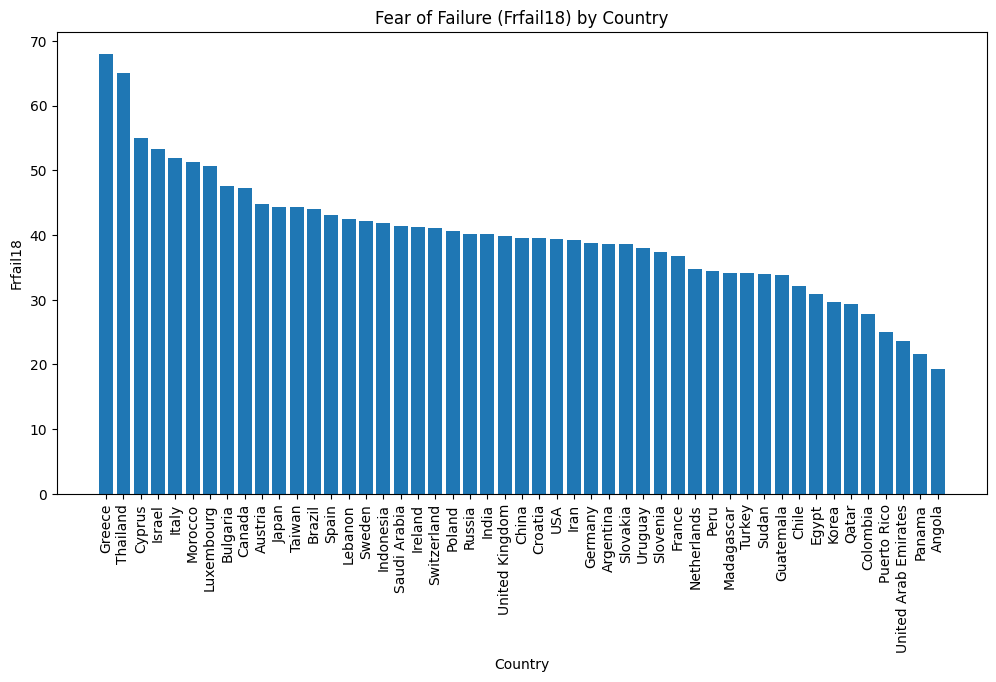

In [2]:
import matplotlib.pyplot as plt

# Sort the filtered_data dataframe by Frfail18 in descending order
sorted_data = data.sort_values('Frfail18', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['country_name'], sorted_data['Frfail18'])
plt.xlabel('Country')
plt.ylabel('Frfail18')
plt.title('Fear of Failure (Frfail18) by Country')
plt.xticks(rotation=90)
plt.show()


**Some Basic Stats on Fear of Failure by Country**

In [6]:
import matplotlib.pyplot as plt

# Show basic statistics
statistics = data['Frfail18'].describe()
print(statistics)


count    49.000000
mean     39.839391
std       9.585373
min      19.289771
25%      34.117296
50%      39.585676
75%      44.045254
max      67.965667
Name: Frfail18, dtype: float64


### GEM 2018 National Data on Fear of Failure

- **Count**: The data set includes observations from 49 countries.
- **Mean**: The average fear of failure rate across these countries is approximately 39.84%, indicating that, on average, about 39.84% of individuals in these countries feel that fear of failure would deter them from starting a business.
- **Standard Deviation (std)**: Measures the variation from the average, with a value of about 9.59%, suggesting significant variability in fear of failure rates across different countries.
- **Minimum (min)**: The lowest reported fear of failure rate among the countries is about 19.29%, showing that in at least one country, only about 19.29% of individuals felt that fear of failure would prevent them from starting a business.
- **25% (First Quartile)**: Approximately 25% of the countries have a fear of failure rate lower than 34.12%, indicating that a quarter of the countries have relatively low rates.
- **Median (50%)**: The median fear of failure rate is approximately 39.59%, which is the middle value of the data set, helping to understand the central tendency without the influence of outliers.
- **75% (Third Quartile)**: About 75% of the countries have a fear of failure rate below 44.05%, suggesting that most countries have fear of failure rates below this percentage.
- **Maximum (max)**: The highest fear of failure rate among the countries is approximately 67.97%, indicating that in the country with the highest rate, about 68% of individuals consider fear of failure a significant deterrent to starting a business.


**Fear of Failure Distribution**

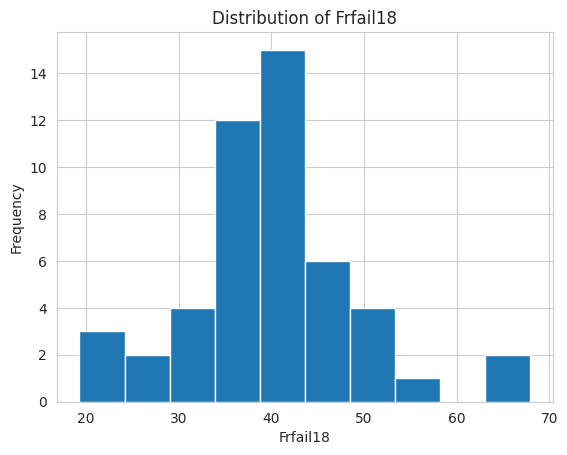

In [ ]:
# Histogram time
plt.hist(filtered_data['Frfail18'], bins=10)
plt.xlabel('Frfail18')
plt.ylabel('Frequency')
plt.title('Distribution of Frfail18')
plt.show()

**Bringing GDP to the Mix**

Not included in the GEM data is the country's GDP. Instead it uses the World Economic Forum Index number which felt a little too abstract to me in its calculation, so I decided to bring in GDP by merging 2018 World Bank data that includes GDP in USD by country_name. I thought it would be a good idea to check the correlation between country GDP and fear of failure before proceeding with the data reflecting attitudes and behaviors around entrepreneurship.

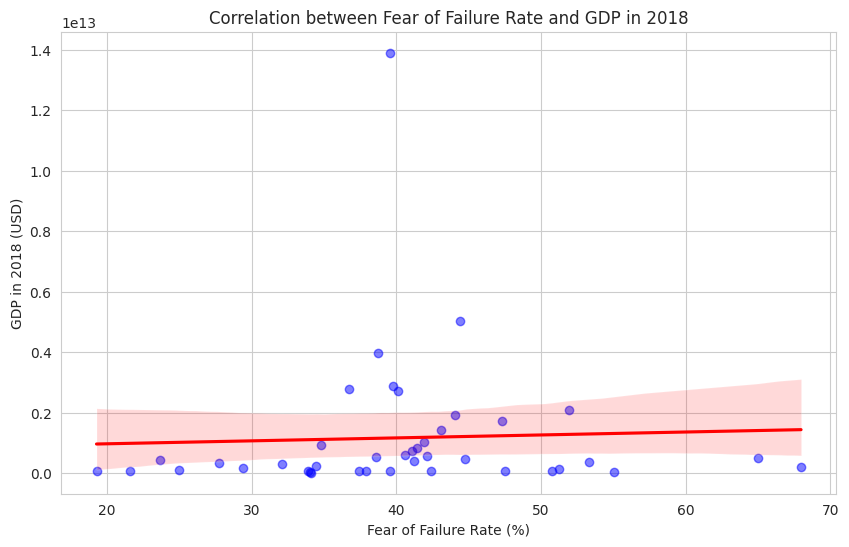

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For regression line and improved aesthetics

# Load the mergedata1.csv file into a dataframe
mergedata1 = pd.read_csv('/workspaces/fof/data/mergedata1.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a scatter plot with a regression line to visualize the correlation
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.regplot(x='Frfail18', y='2018 [YR2018]', data=mergedata1, scatter_kws={'alpha':0.5, 'color': 'blue'}, line_kws={'color': 'red'})

# Labeling the axes and title
plt.xlabel('Fear of Failure Rate (%)')
plt.ylabel('GDP in 2018 (USD)')
plt.title('Correlation between Fear of Failure Rate and GDP in 2018')

# Show the plot
plt.show()



In [ ]:
import numpy as np

# Assuming mergedata1 is your DataFrame
correlation = np.corrcoef(mergedata1['Frfail18'], mergedata1['2018 [YR2018]'])[0, 1]
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.0423651388646494


**R-Squared**

In [32]:
from sklearn.linear_model import LinearRegression

# Define model
model = LinearRegression()

# Fit model
model.fit(mergedata1[['Frfail18']], mergedata1['2018 [YR2018]'])

# R-squared
r_squared = model.score(mergedata1[['Frfail18']], mergedata1['2018 [YR2018]'])
print(f'R-squared: {r_squared}')




R-squared: 0.0017948049910212482


The R-squared value of 0.0018 indicates that only about 0.18% of the variance in the dependent variable (GDP in 2018) can be explained by the independent variable (Fear of Failure Rate) in your model. I was worried GDP would be a main factor, but turns out it does not play a huge role in entrepreneurial fear of a country. 

**Variance Inflation Factor (VIF)**          
             
| Feature         | VIF |
|-----------------|-----|
| 2018 [YR2018]   | inf |
| Bstart18        | inf |
| Bjobst18        | inf |
| Ownmge18        | inf |
| Busang18        | inf |
| ...             | ... |
| TEA18_FamSome   | inf |
| TEA18_FamStrong | inf |
| Frfailno        | inf |
| Easystart18     | inf |
| Nbsocent18      | inf |

Infinite VIF: The VIF values are infinite for many variables, which indicates perfect or extremely high multicollinearity. This condition suggests that one or more variables can be linearly predicted from others with high accuracy.
Implications: High VIF values imply that the standard errors of the coefficients are also high, which can invalidate the tests of significance and confidence intervals used to infer the importance of variables. Variables with high VIF should be considered for removal or combined with other variables to reduce multicollinearity. However, I intend to use some sort of tree models which handle multicollinearity, so I will leave this as is for now.

**Outliers**

In [26]:
from scipy.stats import zscore

# Calculate Z-scores of GDP values
z_scores = zscore(mergedata1['2018 [YR2018]'])
mergedata1['z_score_gdp'] = z_scores

# Identify outliers
outliers = mergedata1[np.abs(mergedata1['z_score_gdp']) > 3]
print(outliers[['Frfail18', '2018 [YR2018]']])


    Frfail18  2018 [YR2018]
7  39.585676   1.390000e+13


Interpretation of the Outlier:

High GDP Value: This observation has a notably high GDP value compared to other data points. A GDP of $13.9 trillion is exceptionally large.

Moderate Fear of Failure Rate: The fear of failure rate of 39.59% is still moderate and within a typical range.

**Heteroskedasticity (non-constant error variance)**

In [46]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'results' is the fitted OLS model from statsmodels
residuals = results.resid
predictions = results.fittedvalues
exog = results.model.exog  # the design matrix

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog)

# Unpack the results
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test

print("Breusch-Pagan Test Statistics:", bp_stat)
print("Breusch-Pagan Test p-value:", bp_pvalue)

if bp_pvalue < 0.05:
    print("The test suggests heteroskedasticity, indicating the linear regression assumptions are not met.")
else:
    print("No evidence of heteroskedasticity, the linear regression assumptions hold.")


Breusch-Pagan Test Statistics: 0.000923275690655756
Breusch-Pagan Test p-value: 0.9757596471556397
No evidence of heteroskedasticity, the linear regression assumptions hold.


The p-value of 0.9757596471556397 is much higher than 0.05. This suggests that there is no statistical evidence of heteroskedasticity. The absence of heteroscedasticity means that the standard errors of the coefficient estimates are reliable.

**Map** 

I am kindof curious would look like on a world map, I think this would help me think about the data more clearly too so lets do that next.

/tmp/ipykernel_2142/1925279031.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


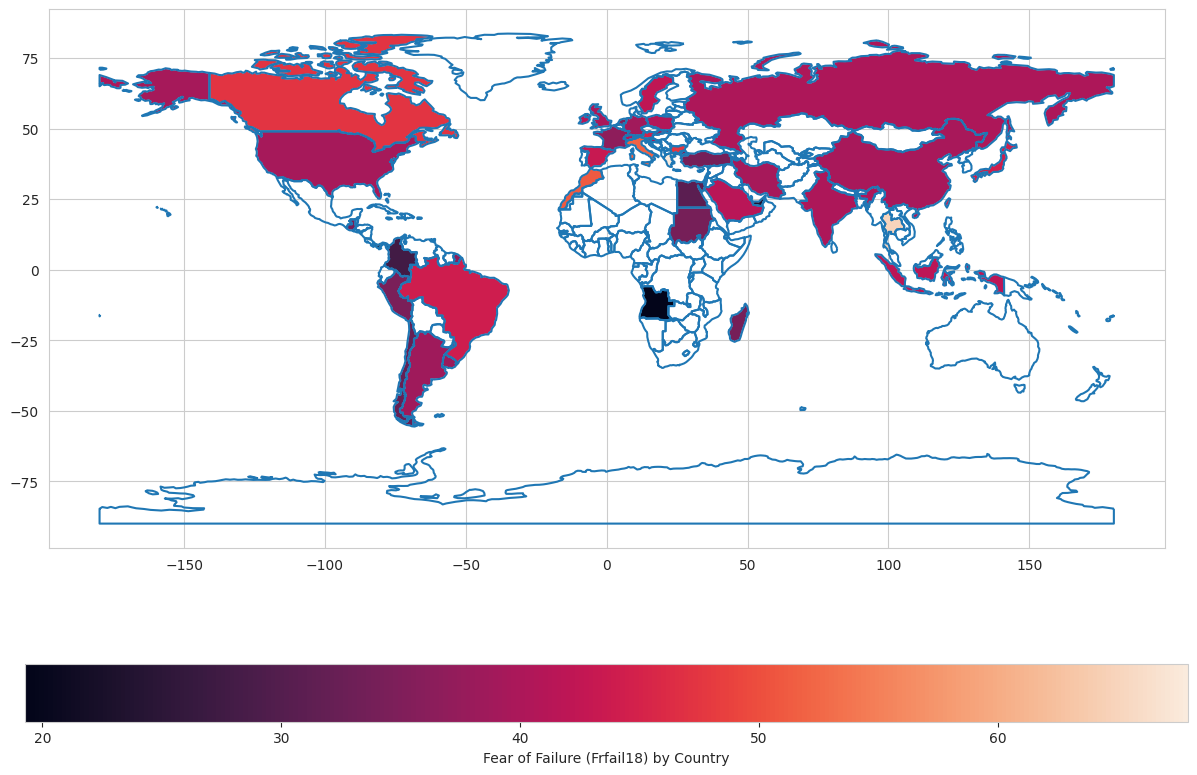

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.loc[world['name'] == 'United States of America', 'name'] = 'USA'

# Merge the world data with your data
world = world.merge(data, how="left", left_on='name', right_on='country_name')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Frfail18', ax=ax, legend=True,
           legend_kwds={'label': "Fear of Failure (Frfail18) by Country",
                        'orientation': "horizontal"})
plt.show()

Hm, well this is cool, but I don't really know what to make of it. It's possible that fear of failure has more to do with the individual rather than which country that person lives in. It also seems to tell me I do not as much data as I thought I did (there are more blank spaces in the map than I was imagining), so it may be better to bring some individual data in. I suppose we can see what that might look like.

### Transitioning to Individual Data as Opposed to National Data
GEM also provides this, and I'll stick with 2018, but the data is much bigger and much more complex.

In [ ]:
import pyreadstat
import pandas as pd

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Try reading the .sav file with specified encoding
try:
    # Attempt to read with utf-8 encoding
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    # If utf-8 fails, try another common encoding such as 'latin1'
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        # If other encodings fail, disable string refinement to bypass encoding issues
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Filter the DataFrame to include only numerical columns
indvdata_numerical = indvdata.select_dtypes(include=['float64', 'int64'])

# Configure pandas to display all columns and prevent line breaks in the DataFrame output
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Display the first few rows of the numerical data and apply styling
styled_head_indvdata = indvdata_numerical.head().style.set_properties(**{
    'background-color': 'black',
    'color': 'lawngreen',
    'border-color': 'white'
})

# Display the styled DataFrame
styled_head_indvdata


,country,REGION,WEFInc,WEFIncREV,yrsurv,setid,ID,weight,WEIGHT_L,WEIGHT_A,GEMWORK,GEMWORK3,GEMOCCU,GEMHHINC,GEMEDUC,UNEDUC,UNEDUC97,knowent,opport,suskill,fearfail,equalinc,nbgoodc,nbstatus,nbmedia,easystart,nbsocent,bstart,bjobst,suacts,suown,suowners,suwage,suwageyr,supay2,sunewcst,sucompet,sunewtec,suexport,sunowjob,suyr5job,sureason,suoptype,ownmge,su_om,omown,omowners,omwageyr,ompay2,omnewcst,omcompet,omnewtec,omexport,omnowjob,omyr5job,omreason,omoptype,omrstart,futsup,discent,exbuscon,exreason,busang,bafund,barel,occufull,occupart,occuself,occuprbs,occugov,occunfp,occuseek,occustu,occuump,occuhome,occurt,occuds,ipactive,ipactivenow,ipphase1,ipphase1role,ipphase2,ipphase2role,ipinit,ipteamsize,ipjob5yr,ipnewcst,ipcompet,ipexport,SUTYPE_ISIC4,OMTYPE_ISIC4,SUREAS_O,OMREAS_O,SUOPTP_O,OMOPTP_O,EXREAS_O,BAREL_O,subustype_code,ombustype_code,sufamily1,sufamily2,sufamily3,omfamily1,omfamily2,omfamily3,geactwork,geonline,geactshare,gehours,gehours3c,geincome,geincome3c,geeduc,gemotiv,geinmot,gepref,gender,age,age7c,age9c,hhsize,DOUBLECOUNT,contact,callback,incontact,SUB,SUBA,SUBO,SUBOA,SUBOANW,OMBABYX,OMESTBX,BABYBUSM,BABYBUSO,ESTBBUSM,ESTBBUSO,ANYBUSOW,SUBOANWC,SUBOANW1,BABYBUS1,ESTBBUS1,BUSOWNER,BO_EXAGR,FUTSUP18,DISCEN18,KNOWEN18,OPPORT18,SUSKIL18,FRFAIL18,EQUALI18,NBGOOD18,NBSTAT18,NBMEDI18,INDSUP18,CULSUP18,TEA18,TEA18MAL,TEA18FEM,TEA18MOP,TEA18FOP,TEA18MNE,TEA18FNE,TEA18STA,TEA18OPP,TEA18NEC,TEA18OTH,TEA18MOT,TEA18IDO,TEA18MIX,SU_18WHY,BB_18WHY,TEA18WHY,EB_18WHY,SU_OPTYP,BB_OPTYP,TEAOPTYP,EB_OPTYP,SU_MOTIV,BB_MOTIV,TEAMOTIV,EB_MOTIV,SUBOPP18,SUBNEC18,NEMALE18,NEFEMA18,SU_ISIC4_4D,BB_ISIC4_4D,EB_ISIC4_4D,TEAISIC4_4D,TEASIC4C,EB_SIC4C,TEAISIC4_1D,EB_ISIC4_1D,TEA18MEM,EB_MEM,TEACUST,EB_CUST,TEACOMP,EB_COMP,TEATECH,EB_TECH,TEA18NTC,EB_18NTC,TEAHITEC,EB_HITEC,TEA18TEC,EB_18TEC,TEA18NPM,EB_18NPM,TEA18JNW,EB_18JNW,TEA18J5Y,EB_18J5Y,TEAJOBGR,EB_JOBGR,TEAJOBGP,EB_JOBGP,TEA18JOB,EB_18JOB,SU_JOB5Y,BB_JOB5Y,EB_JOB5Y,SU_JOBNW,BB_JOBNW,EB_JOBNW,SU_OWNER,BB_OWNER,EB_OWNER,TEAOWNER,TEA18EMP,EB_18EMP,TEA18HJG,EB_18HJG,TEAEXP4C,EB_EXP4C,EXIT_RS,EXIT_CTD,EXIT_ENT,BAFUNDUS,BUSANGVL,TEANEC_P,TEAOPP_P,FRFAILOP,FUTSUPNO,TEAJOBEX,TEANEWPR,TEANEWMK,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1.000000,5.000000,4.000000,3.000000,2018.000000,1180010001.000000,10001.000000,1.237650,1.227517,1.242244,1.000000,10.000000,1.000000,3467.000000,1316.000000,4.000000,4.000000,1.000000,1.000000,1.000000,nan,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,nan,3.000000,0.000000,nan,nan,3.000000,1.000000,2.000000,nan,nan,5.000000,5.000000,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,nan,0.000000,nan,nan,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,nan,nan,nan,nan,nan,nan,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,nan,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,21.000000,nan,2.000000,1.000000,nan,4.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,nan,0.000000,nan,0.000000,nan,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,3.000000,nan,1.000000,nan,2.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,2.000000,nan,5.000000,nan,900.000000,nan,0.000000,nan,5.000000,nan,nan,0.000000,nan,nan,3.000000,nan,nan,3.000000,1.000000,0.000000,0.000000,0.000000,nan,nan,nan,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Oh, wow, that is a lot. Let me give a general summary/outline of the variables below.

### General Information
- **country**: The country where the survey was conducted.
- **REGION**: Geographic region of the survey respondent.
- **WEFInc**: World Economic Forum Inclusiveness index.
- **WEFIncREV**: World Economic Forum Inclusiveness index revised.

### Entrepreneurial Activity and Intentions
- **bstart**: Indicates if the respondent started a business in the past year.
- **bjobst**: Indicates if the respondent's business is expected to create jobs.
- **fearfail**: Respondent's fear of failure rate, which measures the percentage who see opportunities but are deterred by fear of failure.
- **opport**: Perception of available opportunities in the area.
- **knowent**: Knowing other entrepreneurs.
- **suskill**: Perceived capability to start a business based on skills.
- **equalinc**: Perception of whether starting a business is a good way to earn an equal income.

### Work Status
- **GEMWORK**: General employment status.
- **GEMOCCU**: Occupation status, typically detailed into categories like self-employed, employed, student, etc.

### Demographics
- **GEMEDUC**: Education level of the respondent.
- **age**: Age of the respondent.
- **gender**: Gender of the respondent.
- **hhsize**: Household size of the respondent.

### Specific Entrepreneurial Indicators
- **suacts**: Startup activities undertaken.
- **ownmge**: Owns and manages a business.
- **su_om**: Whether the respondent is both starting and owning/managing a business.
- **suexport**: Indicates whether the business exports goods and services.

### Other Detailed Business Activities and Metrics
- **TEA18**: Total early-stage Entrepreneurial Activity - measures the percentage of the population aged 18-64 who are either a nascent entrepreneur or owner-manager of a new business.
- **BUSANG**: Business angel - someone who provides financial capital for small startups or entrepreneurs.
- **bares**: Indicates involvement in a business angel network.
- **EB_18EMP**: Early-stage Business Employee indicator.

### Funding and External Environment
- **BUSANGVL**: Business angel investment level.
- **BAFUNDUS**: Indicates funding usage and needs.
- **IPACT**: Intellectual property activity.

### Advanced Indicators for Global Entrepreneurship Monitoring
- **TEA18MOP**: TEA motivated by opportunity.
- **TEA18FOP**: TEA by females motivated by opportunity.
- **TEA18FNE**: TEA by females out of necessity.


## 2. Modeling

Ok, I'm now gonna make a model. First I will use all the data I have, which will not be very helpful, but will demonstrate how perfect that model will be, since there are some variables that directly correspond to fear of failure and won't help me learn anything new from the data. Think of this as a baseline for the models to come after.

In [47]:
import pyreadstat
import pandas as pd

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Try reading the .sav file with specified encoding
try:
    # Attempt to read with utf-8 encoding
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    # If utf-8 fails, try another common encoding such as 'latin1'
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        # If other encodings fail, disable string refinement to bypass encoding issues
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Filter the DataFrame to include only numerical columns
indvdata_numerical = indvdata.select_dtypes(include=['float64', 'int64'])
      

In [ ]:
import pyreadstat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Try reading the .sav file with specified encoding
try:
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    # If utf-8 fails, try another common encoding such as 'latin1'
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        # If other encodings fail, disable string refinement to bypass encoding issues
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Assuming 'fearfail' is the target variable and ensuring it is included in the dataset
if 'fearfail' not in indvdata.columns:
    raise ValueError("The target variable 'fearfail' is not present in the dataset.")

# Drop rows where the target variable 'fearfail' is NaN before separating the features
indvdata = indvdata.dropna(subset=['fearfail'])

# Filter the DataFrame to include only numerical columns (excluding the target if necessary)
# Remove 'fearfail' from features if it's included in the numeric columns
numeric_features = [col for col in indvdata.select_dtypes(include=['float64', 'int64']).columns if col != 'fearfail']
X = indvdata[numeric_features]
Y = indvdata['fearfail']

# Impute missing values in features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

# Predict on the training data
Y_train_pred = model.predict(X_train)

# Predict on the test data
Y_test_pred = model.predict(X_test)

# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, Y_train_pred))


Training Accuracy: 1.0
Training Confusion Matrix:
 [[62690     0]
 [    0 45012]]
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62690
         1.0       1.00      1.00      1.00     45012

    accuracy                           1.00    107702
   macro avg       1.00      1.00      1.00    107702
weighted avg       1.00      1.00      1.00    107702



In [ ]:
# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))


Test Accuracy: 0.9999783352831578
Test Confusion Matrix:
 [[26581     1]
 [    0 19576]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26582
         1.0       1.00      1.00      1.00     19576

    accuracy                           1.00     46158
   macro avg       1.00      1.00      1.00     46158
weighted avg       1.00      1.00      1.00     46158



**Test Accuracy: 0.9999783352831578**

The model has achieved near-perfect accuracy on the test dataset, which indicates excellent generalization from the training dataset to the unseen test dataset. This score is very close to 1, suggesting that almost all predictions made by the model are correct. Again, this is to be expected because the data includes some variables that are almost identicle to fear of failure. If someone fears entrepreneurial failure in one way, they likely will in a slightly different way as well. These things come down more to how the questions are phrased differently, but good to know the model is working. Actually, let's see exactly what features are the most impactful, this will result in the similar features to the dependent variable and help me see what I should exclude in the next model iteration.

**Revealing Similar Features**

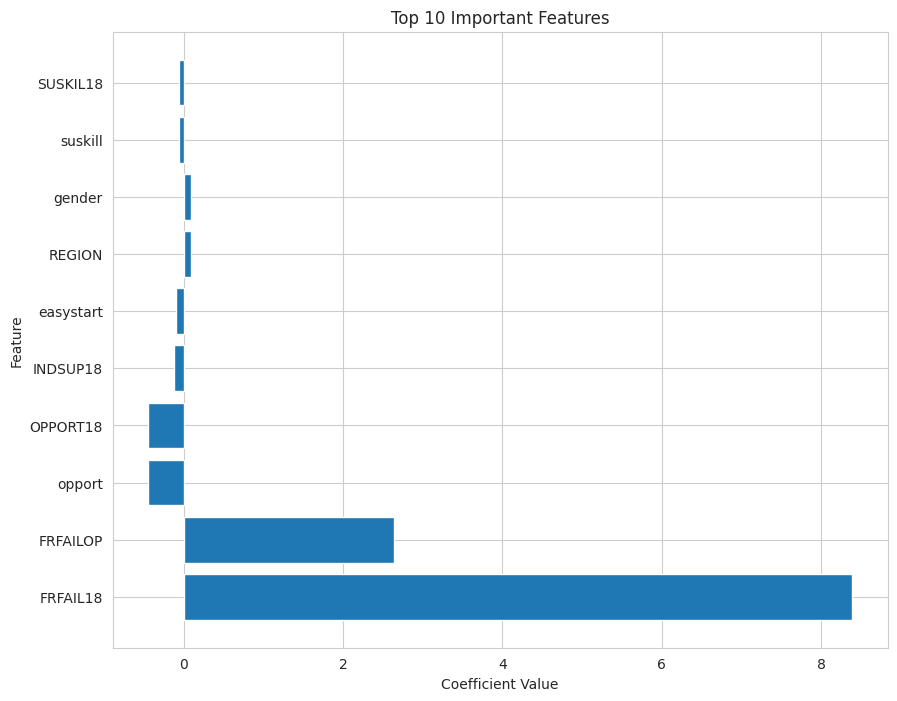

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained Logistic Regression model
feature_names = X.columns  # Ensure this matches the columns used in training after preprocessing
coefficients = model.coef_[0]

# Sort coefficients and features by importance
sorted_indices = np.argsort(abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features[:10], sorted_coefficients[:10])  # Show top 10 features
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()


As I suspected! FRFAILOP and FRFAIL18 measure an individual's perception of the potential consequences of failing in an entrepreneurial endeavor. 

Let's now create a model that cannot use any variable that measures any sort of fear of failure to predict fear of failure. This will be more useful information to me, but unfortunately, will not be as perfect of a model. So, the following model will exclude FRFAILOP and FRFAIL18. 

**Important Note**

I went with a Logistic Regression Model instead of a Linear Regression Model because I am dealing with a classification problem. Either you fear failure, or you do not. A logistic regression will provide a discreet rather than continuous output which makes more sense with what I am working with.

Training Accuracy: 0.615503890364153
Training Confusion Matrix:
 [[49575 13115]
 [28296 16716]]
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.79      0.71     62690
         1.0       0.56      0.37      0.45     45012

    accuracy                           0.62    107702
   macro avg       0.60      0.58      0.58    107702
weighted avg       0.60      0.62      0.60    107702

Test Accuracy: 0.6130898219160276
Test Confusion Matrix:
 [[21010  5572]
 [12287  7289]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.79      0.70     26582
         1.0       0.57      0.37      0.45     19576

    accuracy                           0.61     46158
   macro avg       0.60      0.58      0.58     46158
weighted avg       0.60      0.61      0.59     46158



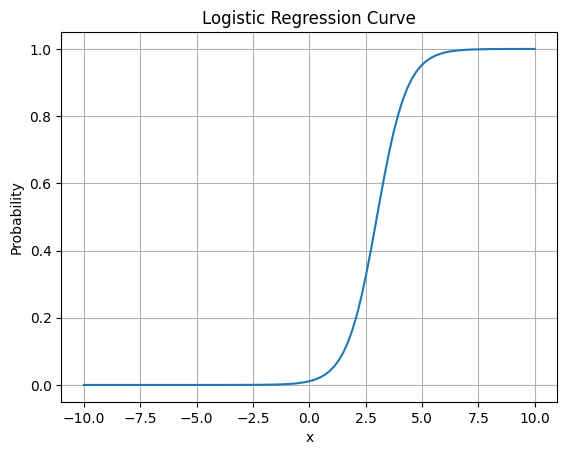

In [14]:
import pyreadstat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Load data, handling potential encoding issues
try:
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Assume 'fearfail' is the target variable, excluding 'FRFAILOP' and 'FRFAIL18' from features
if 'fearfail' not in indvdata.columns:
    raise ValueError("The target variable 'fearfail' is not present in the dataset.")

# Filter out the columns not to be used
indvdata = indvdata.drop(columns=['FRFAILOP', 'FRFAIL18'], errors='ignore')

# Remove rows with missing target variable before separating features and target
indvdata = indvdata.dropna(subset=['fearfail'])

# Select numerical features, excluding the target variable
numeric_features = indvdata.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('fearfail')  # Ensure the target is not used as a feature

X = indvdata[numeric_features]
Y = indvdata['fearfail']

# Impute missing values and scale features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predictions and evaluation
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Print metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, Y_train_pred))

print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))

import matplotlib.pyplot as plt

# Assuming you have the logistic regression coefficients
intercept = -4.5
coef = 1.5

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate the logistic function
logistic = 1 / (1 + np.exp(-(intercept + coef * x)))

# Plot the logistic function
plt.plot(x, logistic)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.grid(True)
plt.show()


**Training Accuracy: 0.6155**

The model correctly predicts the class labels for 61.55% of the training set. This is a moderate accuracy level, suggesting there's room for improvement.

**Test Accuracy: 0.6131**

The model achieves a similar accuracy on the test dataset, indicating that the model's training performance generalizes well to unseen data, but with the same limitations.

### Logistic Regression Model Overview

**Logistic Regression** is a statistical model used to predict binary outcomes, such as "yes" or "no", "success" or "failure". It is particularly useful when the outcome to predict is dichotomous, which fear of failure is, at least in this context.

### Mathematical Foundation
- **Logistic Function (Sigmoid Function):** This function is used to estimate probabilities that range between 0 and 1. It is defined as:
  $$
  \sigma(t) = \frac{1}{1 + e^{-t}}
  $$
  where \( t \) is the linear combination of input features, and \( e \) is the Euler's number.

### Model Fitting
- **Linear Combination:** A linear equation combining the input features:
  $$
  z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
  $$
  Here, $ \beta_i $ represents coefficients, and $ x_i $ are the input features.

- **Probability Estimation:** The probability of the input belonging to the default category (1) is modeled by:
  $$
  P(y = 1 | x) = \frac{1}{1 + e^{-z}}
  $$

### Decision Making
- **Threshold:** A typical threshold of 0.5 is used. If \( P(y = 1 | x) > 0.5 \), predict "1"; otherwise, "0".

### Interpretation of Coefficients
- **Odds Ratio:** Coefficients can be exponentiated to interpret them as odds ratios, influencing the likelihood of outcomes.

### Limitations
- **Multicollinearity** For this reason I will move onto a model that is more tolerant of this.
- **Linearity Assumption:** Assumes a linear relationship between the log odds of the outcome and the input features.
- **Sensitivity to Outliers:** Requires careful handling of outliers as they can significantly impact model estimates.

### **Checking Top Features**

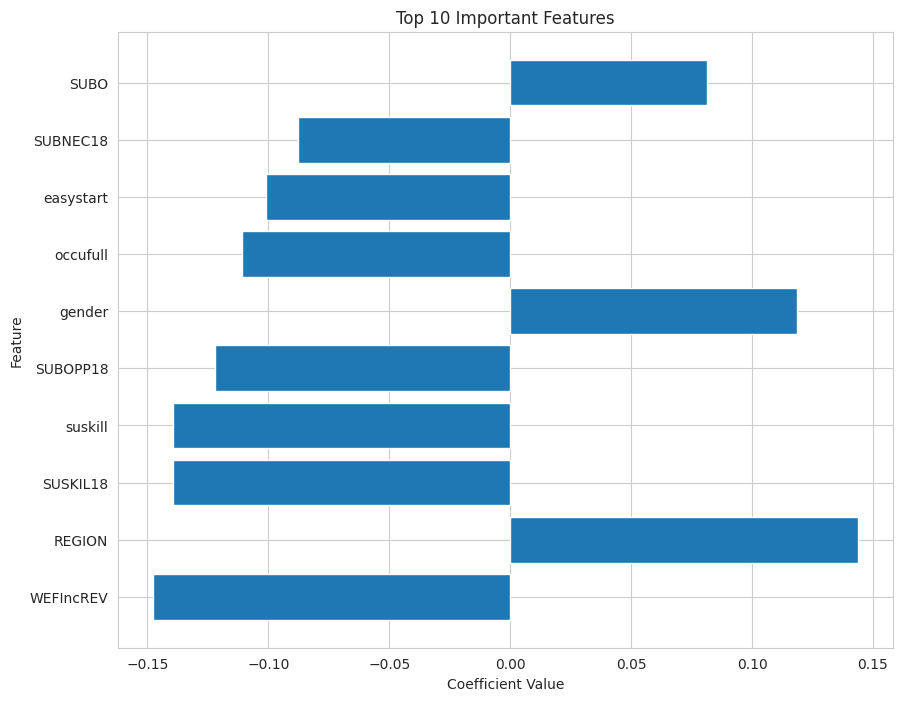

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained Logistic Regression model
feature_names = X.columns  # Ensure this matches the columns used in training after preprocessing
coefficients = model.coef_[0]

# Sort coefficients and features by importance
sorted_indices = np.argsort(abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features[:10], sorted_coefficients[:10])  # Show top 10 features
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()



### SUBO (Start Up Business Owner):
- **Positive Influence**: This feature having a positive coefficient suggests that being a startup business owner or engaging in startup activities increases the likelihood of experiencing fear of failure. This could be because starting a business involves significant risk and uncertainty, and these guys have already gone through it! Not encouraging at all tbh!

### SUBNEC18 (Startup Necessity):
- **Negative Influence**: This indicates that entrepreneurs who started their businesses out of necessity (rather than opportunity) are less likely to fear failure. Necessity entrepreneurs have less to lose, so starting a business may be less daunting.

### easystart (Ease of Starting a Business):
- **Negative Influence**: This suggests that perceptions or realities of it being easier to start a business correlate with reduced fear of failure. If an entrepreneur believes that starting a business is straightforward or the environment is conducive, they may feel less intimidated by the prospects of failure. Makes sense, I guess.

### occufull (Full-Time Occupation):
- **Negative Influence**: This feature represents being employed full-time, its negative influence means that those who are also working full-time while venturing into entrepreneurship feel less pressure or fear of failure, possibly due to having another stream of income.

### gender:
- **Positive Influence**: This indicates that males tend to report lower fear of failure compared to the females, which could highlight gender-specific attitudes towards entrepreneurship and risk.

### SUBOPP18 (Startup Opportunity):
- **Negative Influence**: Contrary to necessity, starting a business based on perceived opportunities seems to reduce fear of failure. Entrepreneurs who see viable opportunities may feel more confident in their venture’s success. Again, I think this makes sense.

### suskill (Subjective Skill Assessment):
- **Negative Influence**: This implies that those who rate their entrepreneurial skills highly feel less fear. Confidence is key!

### REGION:
- **Positive Influence**: This suggests that specific regions might have cultural or economic conditions that reduce the fear of failure, perhaps due to better support systems or less stigma associated with failing. 

### WEFIncREV (World Economic Forum Inclusiveness Index Revised):
- **Negative Influence**: Higher inclusiveness scores might correlate with environments that support entrepreneurial failures as learning experiences rather than stigmas, thereby reducing fear of failure.


Ok, now a differnt type of model.

### **Random Forest Model**

Random forest is a commonly-used machine learning algorithm that combines the output of multiple decision trees to reach a single result. It can handle both classification and regression problems, which is why I wanted to try it. It is also tolerant of multicollinearity.

In [8]:
import pyreadstat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Load data, handling potential encoding issues
try:
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Assume 'fearfail' is the target variable, excluding 'FRFAILOP' and 'FRFAIL18' from features
if 'fearfail' not in indvdata.columns:
    raise ValueError("The target variable 'fearfail' is not present in the dataset.")

# Filter out the columns not to be used
indvdata = indvdata.drop(columns=['FRFAILOP', 'FRFAIL18'], errors='ignore')

# Remove rows with missing target variable before separating features and target
indvdata = indvdata.dropna(subset=['fearfail'])

# Select numerical features, excluding the target variable
numeric_features = indvdata.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('fearfail')  # Ensure the target is not used as a feature

X = indvdata[numeric_features]
Y = indvdata['fearfail']

# Impute missing values and scale features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Predictions and evaluation
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Print metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, Y_train_pred))

print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))


Training Accuracy: 0.9999907151213534
Training Confusion Matrix:
 [[62690     0]
 [    1 45011]]
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62690
         1.0       1.00      1.00      1.00     45012

    accuracy                           1.00    107702
   macro avg       1.00      1.00      1.00    107702
weighted avg       1.00      1.00      1.00    107702

Test Accuracy: 0.6436804020971446
Test Confusion Matrix:
 [[21196  5386]
 [11061  8515]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.80      0.72     26582
         1.0       0.61      0.43      0.51     19576

    accuracy                           0.64     46158
   macro avg       0.63      0.62      0.61     46158
weighted avg       0.64      0.64      0.63     46158



### Training Performance
- **Training Accuracy:** 99.999%
  - This near-perfect accuracy suggests that the model has effectively learned to classify almost every training example correctly.
- **Training Confusion Matrix:**
  - **True Negatives:** 62,690
  - **True Positives:** 45,011
  - **False Negatives:** 1
  - **False Positives:** 0
- **Classification Report:**
  - Precision, recall, and F1-score are nearly perfect at 1.00 for both classes, indicating exceptional performance on the training data.

### Test Performance
- **Test Accuracy:** 64.37%
  - The significant drop in accuracy when applied to test data suggests overfitting; the model does not generalize super well to new, unseen data.
- **Test Confusion Matrix:**
  - **True Negatives:** 21,196
  - **True Positives:** 8,515
  - **False Negatives:** 5,386
  - **False Positives:** 11,061

I will now make some changes to this random forest model that may help:

1. Cross-Validation: Instead of a single train-test split, I use cross-validation.

2. Hyperparameter Tuning: Use a grid search to find the best parameters for the RandomForestClassifier to potentially improve model performance.

3. Balance the Dataset: If my target classes are imbalanced, I use SMOTE to adjust the class weight parameter in the model.

In [10]:
import pyreadstat
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Load data, handling potential encoding issues
try:
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Exclude 'FRFAILOP' and 'FRFAIL18' from features
indvdata = indvdata.drop(columns=['FRFAILOP', 'FRFAIL18'], errors='ignore')

# Remove rows with missing target variable 'fearfail'
indvdata = indvdata.dropna(subset=['fearfail'])

# Select numerical features, excluding the target variable
numeric_features = indvdata.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('fearfail')  # Ensure the target is not used as a feature

X = indvdata[numeric_features]
Y = indvdata['fearfail']

# Define pipeline steps
pipeline = make_pipeline_imb(
    SimpleImputer(strategy='median'),  # Impute missing values
    StandardScaler(),  # Scale features
    SMOTE(random_state=42),  # Apply SMOTE for balancing
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit model on training data
pipeline.fit(X_train, Y_train)

# Predictions and evaluation on both training and test data
Y_train_pred = pipeline.predict(X_train)
Y_test_pred = pipeline.predict(X_test)

# Print metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, Y_train_pred))

print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))


Training Accuracy: 0.9999907151213534
Training Confusion Matrix:
 [[62689     1]
 [    0 45012]]
Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62690
         1.0       1.00      1.00      1.00     45012

    accuracy                           1.00    107702
   macro avg       1.00      1.00      1.00    107702
weighted avg       1.00      1.00      1.00    107702

Test Accuracy: 0.6451319381255687
Test Confusion Matrix:
 [[20396  6186]
 [10194  9382]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.77      0.71     26582
         1.0       0.60      0.48      0.53     19576

    accuracy                           0.65     46158
   macro avg       0.63      0.62      0.62     46158
weighted avg       0.64      0.65      0.64     46158



These changes made an improvement, but it was very very small. What I should probably do it just look at a couple different variables. I want to make a model with a couple variables that are easy questions to answer. For example, you may not know for sure if the opportunity to start a business is good in your area, but you for sure know if you are occupied full time or not. I am choosing to make another random forest model that only considers gender, age, country, whether or not you are a full-time employee, and the size of your household.

In [12]:
import pyreadstat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the .sav file
file_path = '/workspaces/fof/data/GEM2018IndvData.sav'

# Load data, handling potential encoding issues
try:
    indvdata, meta = pyreadstat.read_sav(file_path, encoding='utf-8')
except pyreadstat.ReadstatError:
    try:
        indvdata, meta = pyreadstat.read_sav(file_path, encoding='latin1')
    except pyreadstat.ReadstatError:
        indvdata, meta = pyreadstat.read_sav(file_path, disable_str_refinement=True)

# Ensure the target variable 'fearfail' is present in the dataset
if 'fearfail' not in indvdata.columns:
    raise ValueError("The target variable 'fearfail' is not present in the dataset.")

# Select only the required features
features = ['hhsize', 'country', 'age', 'gender', 'occufull']
features.extend(['fearfail'])  # Include the target variable for dropping NaNs

# Filter the DataFrame for the required columns
indvdata = indvdata[features]

# Remove rows with missing target variable or any of the features
indvdata = indvdata.dropna()

# Split data into features and target
X = indvdata[['hhsize', 'country', 'age', 'gender', 'occufull']]
Y = indvdata['fearfail']

# Handling categorical variables by one-hot encoding
X = pd.get_dummies(X, columns=['country', 'gender', 'occufull'])

# Impute missing values and scale features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Predictions and evaluation
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Print metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))




Training Accuracy: 0.7537475762556718
Training Confusion Matrix:
 [[49393  9546]
 [15473 27187]]
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     58939
         1.0       0.74      0.64      0.68     42660

    accuracy                           0.75    101599
   macro avg       0.75      0.74      0.74    101599
weighted avg       0.75      0.75      0.75    101599

Test Accuracy: 0.5642009048526744
Test Confusion Matrix:
 [[17119  8131]
 [10845  7448]]
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.68      0.64     25250
         1.0       0.48      0.41      0.44     18293

    accuracy                           0.56     43543
   macro avg       0.55      0.54      0.54     43543
weighted avg       0.56      0.56      0.56     43543



Well, it seems that these characteristics have some influence on whether or not you will fear failing in the realm of entrepreneurship, but not really enough for it to matter much. This is to be expected. Everyone is different and what makes a person fear failure is so much more complex than what the data that GEM publishes, as big as it is, can explain to us. Still, it is pretty cool that a random forest model can with about 65% accuracy predict whether an individual will fear failure or not. If this was predicting whether a stock would go up or down, this would be pretty good odds! As for the practical application of these finding though, it seems that there are not any couple of specific characteristics, at least not within the tested data that is strongly correlated with fear or lack of fear of failure. In a way this is a good thing, because if I found out that just by being a woman in the United States I was almost certainly going to fear failure, I would be sad!

## 3. Explanation

I have already done some critical thrinking whilst doing my initial anlysis and creating models, but now I am going to consult some experts and see what they say about the more interesting things I've discovered in the data.

I specifically want to get into startup necessity. It seems that needing to become an entrepreneur to survive has some effect in reducing fear of failure. I find this interesting because if you are starting a business out of **necessity** you need that business to support you. The stakes are high! I can think of a couple ideas why this might be. 1. Maybe in the communities where this is common, becoming an entrepreneur is viewed as a normal activity. 2. Maybe people who start businesses out of necessity are operating on a smaller scale. Meaning their business requires less capital. For example selling candybars on the subway as opposed to creating tech startup. 3. It also seems possible to me that people who start a business out of necessity likely have a bigger community of support. For example, maybe the entire family gets involved. 4. Maybe more often people that start businesses out of necessity live in places with fewer regulations or barriers to entry for starting a business, at least for businesses on the small scale? Let's see if I can find anything to back up these guesses.

**What the Experts Say**

Accorning to the MIT Entrepreneurship Center, necessity-driven entrepreneurs may experience reduced fear of failure due to several reasons outlined. Firstly, such entrepreneurs often start businesses as a response to urgent personal or economic needs, such as job loss or inadequate career opportunities, which might overshadow their fear of failure with a stronger necessity to succeed. Consider Joanne who was let go from her job aroung the same time that her son required more help for his medical conditions. Out of **neccessity** she did tons of research to help him in any way possible, including alternatives to mainstream treatment, and she started an unpaid e-mail service to friends and family sharing what she learned. She was inspired to make a career out of it. Without fear she decided to take the plunge, pursued further education, and then started JBS Holistic Nutrition where she offers health coaching and healing alternatives. This is only one example but a paper by Raphael Amit and Eitan Muller called "Push and Pull Entrepreneurship" argues that "push" factors drive certain people to entrepreneurship when the venture feel like the only viable option, thus mentally reducing the space for fear as failure is less acceptable when alternatives are limited. Moreover, the involvement of community and family, as seen in many necessity-driven ventures, can provide a supportive safety net that mitigates fear​ (MIT Entrepreneurship Center)​.

Cool! So seems my analysis does not contradict what experts argue!

Links:

[Push and Pull Entrepreneurship](https://www.tandfonline.com/doi/pdf/10.1080/08276331.1995.10600505?needAccess=true)

[Necessity vs Innovation-Based Entrepreneurs - MIT Entrepreneurship Center](https://entrepreneurship.mit.edu/necessity-vs-innovation-based-entrepreneurs/)

